In [59]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/7k-books-with-metadata/books.csv


In [60]:
df=pd.read_csv('/kaggle/input/7k-books-with-metadata/books.csv')

In [61]:
df

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count
0,9780002005883,0002005883,Gilead,NaN,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0
1,9780002261982,0002261987,Spider's Web,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0
2,9780006163831,0006163831,The One Tree,NaN,Stephen R. Donaldson,American fiction,http://books.google.com/books/content?id=OmQaw...,Volume Two of Stephen Donaldson's acclaimed se...,1982.0,3.97,479.0,172.0
3,9780006178736,0006178731,Rage of angels,NaN,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,29532.0
4,9780006280897,0006280897,The Four Loves,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,170.0,33684.0
...,...,...,...,...,...,...,...,...,...,...,...,...
6805,9788185300535,8185300534,I Am that,Talks with Sri Nisargadatta Maharaj,Sri Nisargadatta Maharaj;Sudhakar S. Dikshit,Philosophy,http://books.google.com/books/content?id=Fv_JP...,This collection of the timeless teachings of o...,1999.0,4.51,531.0,104.0
6806,9788185944609,8185944601,Secrets Of The Heart,NaN,Khalil Gibran,Mysticism,http://books.google.com/books/content?id=XcrVp...,NaN,1993.0,4.08,74.0,324.0
6807,9788445074879,8445074873,Fahrenheit 451,NaN,Ray Bradbury,Book burning,NaN,NaN,2004.0,3.98,186.0,5733.0
6808,9789027712059,9027712050,The Berlin Phenomenology,NaN,Georg Wilhelm Friedrich Hegel,History,http://books.google.com/books/content?id=Vy7Sk...,Since the three volume edition ofHegel's Philo...,1981.0,0.00,210.0,0.0


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6810 entries, 0 to 6809
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   isbn13          6810 non-null   int64  
 1   isbn10          6810 non-null   object 
 2   title           6810 non-null   object 
 3   subtitle        2381 non-null   object 
 4   authors         6738 non-null   object 
 5   categories      6711 non-null   object 
 6   thumbnail       6481 non-null   object 
 7   description     6548 non-null   object 
 8   published_year  6804 non-null   float64
 9   average_rating  6767 non-null   float64
 10  num_pages       6767 non-null   float64
 11  ratings_count   6767 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 638.6+ KB


In [63]:
df.isnull().sum()

isbn13               0
isbn10               0
title                0
subtitle          4429
authors             72
categories          99
thumbnail          329
description        262
published_year       6
average_rating      43
num_pages           43
ratings_count       43
dtype: int64

In [64]:
df.drop(columns=['subtitle','thumbnail'],inplace=True) # drop unuse columns

In [65]:
df.dropna(inplace=True) # drop null value rows

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns

# EDA 

In [67]:
df.columns

Index(['isbn13', 'isbn10', 'title', 'authors', 'categories', 'description',
       'published_year', 'average_rating', 'num_pages', 'ratings_count'],
      dtype='object')

## Number of books Published by Aurthors

In [68]:
top_authors=df['authors'].value_counts()[0:10]

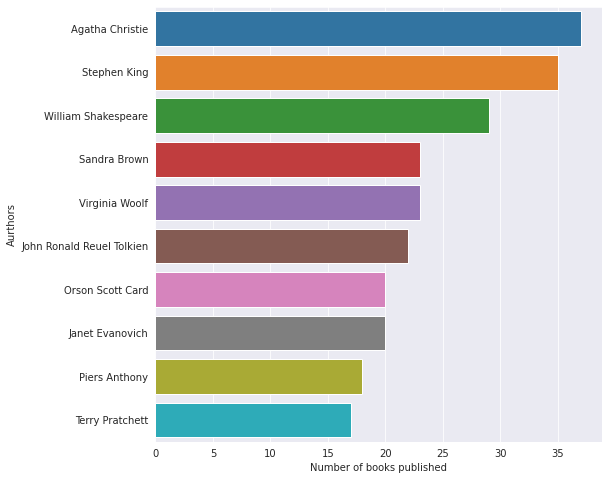

In [69]:
plt.figure(figsize=(8,8))
sns.set_style('darkgrid')
sns.barplot(data=df,x=top_authors.values,y=top_authors.index)
plt.ylabel("Aurthors")
plt.xlabel("Number of books published")
plt.show()

## Popular categories of books

In [70]:
top_book_category=df['categories'].value_counts()[0:10]

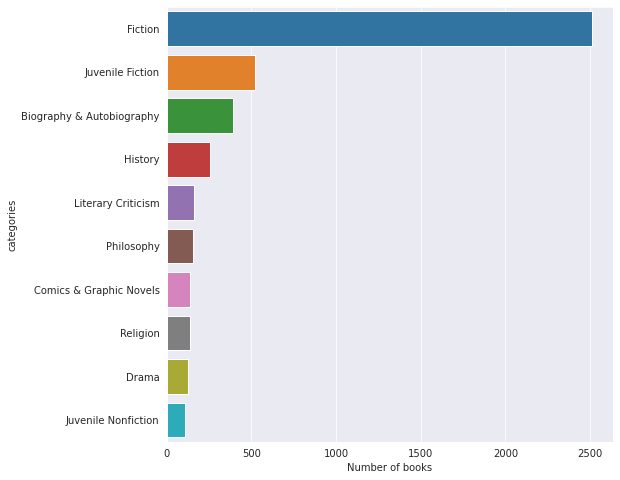

In [71]:
plt.figure(figsize=(8,8))
sns.barplot(data=df,x=top_book_category.values,y=top_book_category.index)
plt.ylabel("categories")
plt.xlabel("Number of books")
plt.show()

## Which years most books published

In [72]:
df['published_year']=df['published_year'].astype(str) # change dtypes from float to int

In [73]:
top_year=df['published_year'].value_counts()[0:10]

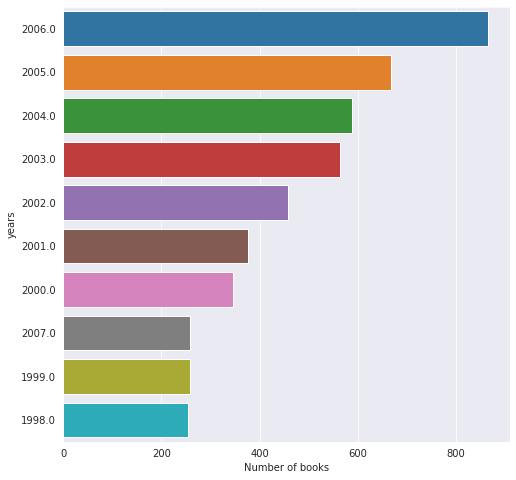

In [74]:
plt.figure(figsize=(8,8))
sns.barplot(data=df,x=top_year.values,y=top_year.index)
plt.ylabel("years")
plt.xlabel("Number of books")
plt.show()

## Average Ratings of books

In [75]:
top_high_rating_books=df.groupby(['title','average_rating'])['title'].count().to_frame()

In [76]:
top_high_rating_books.rename(columns={'title':'total_book'},inplace=True)

In [77]:
top_high_rating_books.sort_values("total_book",ascending=False,inplace=True)

In [78]:
top_high_rating_books[0:10]

,,total_book
title,average_rating,
One Hundred Years of Solitude,4.06,6
The Lord of the Rings,4.49,5
A Midsummer Night's Dream,3.94,4
Lord of the Flies,3.67,4
The Odyssey,3.75,4
Emma,3.99,3
The Invisible Man,3.63,3
Romeo and Juliet,3.74,3
The Picture of Dorian Gray,4.07,3


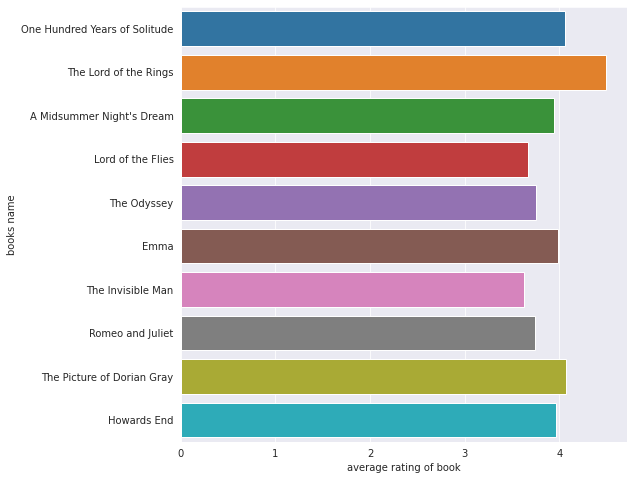

In [79]:
plt.figure(figsize=(8,8))
sns.barplot(data=top_high_rating_books,x=top_high_rating_books.index.get_level_values('average_rating')[0:10],y=top_high_rating_books.index.get_level_values('title')[0:10],)
plt.ylabel("books name")
plt.xlabel("average rating of book")
plt.show()

### change dtype of columns

In [80]:
df['published_year'].unique()

array(['2004.0', '2000.0', '1982.0', '1993.0', '2002.0', '1977.0',
       '1998.0', '1994.0', '1996.0', '1995.0', '2003.0', '1997.0',
       '2001.0', '2007.0', '2005.0', '2006.0', '1992.0', '1970.0',
       '1986.0', '1979.0', '1966.0', '1971.0', '1960.0', '1991.0',
       '1978.0', '1962.0', '1981.0', '1963.0', '1999.0', '1953.0',
       '1989.0', '1988.0', '1990.0', '1965.0', '1984.0', '1945.0',
       '1985.0', '1980.0', '1964.0', '1968.0', '1976.0', '1973.0',
       '1972.0', '1943.0', '1969.0', '1940.0', '1967.0', '1987.0',
       '2008.0', '1949.0', '1959.0', '1961.0', '1975.0', '1983.0',
       '1876.0', '1955.0', '1939.0', '1958.0', '1948.0', '1927.0',
       '1952.0', '1974.0', '1946.0', '1950.0', '1957.0', '2012.0',
       '2017.0', '1956.0', '2009.0', '1938.0', '1941.0', '2015.0',
       '2010.0', '2014.0', '2011.0', '1954.0', '1925.0', '1942.0',
       '2013.0', '1929.0', '1934.0', '1951.0', '1944.0', '2019.0',
       '1930.0', '1936.0', '1926.0', '1928.0'], dtype=object)

In [81]:
# published_year column is object
df['published_year']=df['published_year'].astype(float) # convert in float

In [82]:
df['published_year']=df['published_year'].astype(int) # convert in int

# Preprocessing books description

In [83]:
df[['description']]

,description
0,A NOVEL THAT READERS and critics have been eag...
1,A new 'Christie for Christmas' -- a full-lengt...
2,Volume Two of Stephen Donaldson's acclaimed se...
3,"A memorable, mesmerizing heroine Jennifer -- b..."
4,Lewis' work on the nature of love divides love...
...,...
6803,This book tells the tale of a man who goes on ...
6804,"Wisdom to Create a Life of Passion, Purpose, a..."
6805,This collection of the timeless teachings of o...
6808,Since the three volume edition ofHegel's Philo...


## Convert columns values in lowercase

In [84]:
# convert lowercase
df['description']=df['description'].str.lower()
df['title']=df['title'].str.lower()

# Remove Punctuations from Words

In [85]:
import string

In [86]:
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

In [87]:
df["description"] = df['description'].apply(remove_punctuations)
df['title']=df['title'].apply(remove_punctuations)
df['authors']=df['authors'].apply(remove_punctuations)
df['categories']=df['categories'].apply(remove_punctuations)

In [88]:
df

,isbn13,isbn10,title,authors,categories,description,published_year,average_rating,num_pages,ratings_count
0,9780002005883,0002005883,gilead,Marilynne Robinson,Fiction,a novel that readers and critics have been eag...,2004,3.85,247.0,361.0
1,9780002261982,0002261987,spiders web,Charles OsborneAgatha Christie,Detective and mystery stories,a new christie for christmas a fulllength nov...,2000,3.83,241.0,5164.0
2,9780006163831,0006163831,the one tree,Stephen R Donaldson,American fiction,volume two of stephen donaldsons acclaimed sec...,1982,3.97,479.0,172.0
3,9780006178736,0006178731,rage of angels,Sidney Sheldon,Fiction,a memorable mesmerizing heroine jennifer bril...,1993,3.93,512.0,29532.0
4,9780006280897,0006280897,the four loves,Clive Staples Lewis,Christian life,lewis work on the nature of love divides love ...,2002,4.15,170.0,33684.0
...,...,...,...,...,...,...,...,...,...,...
6803,9788173031014,8173031010,journey to the east,Hermann Hesse,Adventure stories,this book tells the tale of a man who goes on ...,2002,3.70,175.0,24.0
6804,9788179921623,817992162X,the monk who sold his ferrari a fable about fu...,Robin Sharma,Health Fitness,wisdom to create a life of passion purpose and...,2003,3.82,198.0,1568.0
6805,9788185300535,8185300534,i am that,Sri Nisargadatta MaharajSudhakar S Dikshit,Philosophy,this collection of the timeless teachings of o...,1999,4.51,531.0,104.0
6808,9789027712059,9027712050,the berlin phenomenology,Georg Wilhelm Friedrich Hegel,History,since the three volume edition ofhegels philos...,1981,0.00,210.0,0.0


# Remove Stopwords

In [89]:
#remove stopwords
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

In [90]:
def remove_stopword(text):
    return " ".join(word for word in str(text).split() if word not in stop_words)

In [91]:
df["description"] = df['description'].apply(remove_stopword)
df['title']=df['title'].apply(remove_stopword)
df['authors']=df['authors'].apply(remove_stopword)
df['categories']=df['categories'].apply(remove_stopword)

In [92]:
df

,isbn13,isbn10,title,authors,categories,description,published_year,average_rating,num_pages,ratings_count
0,9780002005883,0002005883,gilead,Marilynne Robinson,Fiction,novel readers critics eagerly anticipating dec...,2004,3.85,247.0,361.0
1,9780002261982,0002261987,spiders web,Charles OsborneAgatha Christie,Detective mystery stories,new christie christmas fulllength novel adapte...,2000,3.83,241.0,5164.0
2,9780006163831,0006163831,one tree,Stephen R Donaldson,American fiction,volume two stephen donaldsons acclaimed second...,1982,3.97,479.0,172.0
3,9780006178736,0006178731,rage angels,Sidney Sheldon,Fiction,memorable mesmerizing heroine jennifer brillia...,1993,3.93,512.0,29532.0
4,9780006280897,0006280897,four loves,Clive Staples Lewis,Christian life,lewis work nature love divides love four categ...,2002,4.15,170.0,33684.0
...,...,...,...,...,...,...,...,...,...,...
6803,9788173031014,8173031010,journey east,Hermann Hesse,Adventure stories,book tells tale man goes wonderful amazing jou...,2002,3.70,175.0,24.0
6804,9788179921623,817992162X,monk sold ferrari fable fulfilling dreams reac...,Robin Sharma,Health Fitness,wisdom create life passion purpose peace inspi...,2003,3.82,198.0,1568.0
6805,9788185300535,8185300534,,Sri Nisargadatta MaharajSudhakar S Dikshit,Philosophy,collection timeless teachings one greatest sag...,1999,4.51,531.0,104.0
6808,9789027712059,9027712050,berlin phenomenology,Georg Wilhelm Friedrich Hegel,History,since three volume edition ofhegels philosophy...,1981,0.00,210.0,0.0


# Stemming Words

In [93]:
#stemming
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()

In [94]:
def stem_words(text):
    return " ".join(stemmer.stem(word) for word in text.split())

In [95]:
df['description']=df['description'].apply(stem_words)

### Remove Extra Spaces

In [96]:
df['description']=df['description'].str.strip()

### join authors name with space

In [97]:
def join_space(text):
    return text.replace(" ","")

In [98]:
df['authors']=df['authors'].apply(join_space)

## Join authors and categories columns values with description column value

In [99]:
df['text']=df['description']+" "+df['authors']+" "+df['categories'] # join authors and categories columns with description column
df['description']=df['description']+" "+df['authors']+" "+df['categories'] # join authors and categories columns with description column

In [100]:
df.iloc[0,10]

'novel reader critic eagerli anticip decad gilead astonishingli imagin stori remark live john ame preacher son preacher grandson matern patern preacher it’ 1956 gilead iowa toward end reverend ames’ life absorb record family’ stori legaci young son never see grow haunt grandfather’ presenc john tell rift grandfath father elder angri visionari fought abolitionist caus son ardent pacifist troubl prodig namesak jack john ame boughton best friend’ lost son return gilead search forgiv redempt told john ames’ joyou rambl voic find beauti humour truth smallest life’ detail gilead song celebr accept best worst world offer heart tale sacr bond father son pitchperfect style stori set dazzl critic reader alik MarilynneRobinson Fiction'

# Word Tokenize

In [101]:
from nltk.tokenize import word_tokenize

In [102]:
def token(text):
    return word_tokenize(text)

In [103]:
df['text']=df['text'].apply(token)

In [104]:
df['text'].shape

(6411,)

# Word to Vectorizer

In [105]:
from sklearn.feature_extraction.text import CountVectorizer

In [106]:
cv=CountVectorizer(max_features=6500,stop_words='english')

In [107]:
# store in new df
new_df=df[['title','description']]

In [108]:
new_df

,title,description
0,gilead,novel reader critic eagerli anticip decad gile...
1,spiders web,new christi christma fulllength novel adapt ac...
2,one tree,volum two stephen donaldson acclaim second tri...
3,rage angels,memor mesmer heroin jennif brilliant beauti at...
4,four loves,lewi work natur love divid love four categori ...
...,...,...
6803,journey east,book tell tale man goe wonder amaz journey asi...
6804,monk sold ferrari fable fulfilling dreams reac...,wisdom creat life passion purpos peac inspir t...
6805,,collect timeless teach one greatest sage india...
6808,berlin phenomenology,sinc three volum edit ofhegel philosophi subje...


In [109]:
vectors=cv.fit_transform(new_df['description']).toarray()

In [110]:
vectors

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

# most occur features

In [111]:
cv.get_feature_names()

['10',
 '100',
 '1000',
 '10000',
 '100000',
 '11',
 '12',
 '12500',
 '125000',
 '13',
 '14',
 '15',
 '150',
 '15000',
 '150000',
 '1599',
 '16',
 '17',
 '17500',
 '18',
 '1812',
 '1818',
 '1840',
 '1850',
 '1870',
 '1897',
 '19',
 '1900',
 '1906',
 '1914',
 '1916',
 '1917',
 '1919',
 '1920',
 '1923',
 '1925',
 '1929',
 '1930',
 '1932',
 '1934',
 '1935',
 '1936',
 '1937',
 '1939',
 '1940',
 '1941',
 '1942',
 '1944',
 '1945',
 '1946',
 '1949',
 '1950',
 '1951',
 '1953',
 '1954',
 '1957',
 '1959',
 '1960',
 '1961',
 '1962',
 '1963',
 '1964',
 '1967',
 '1968',
 '1969',
 '1970',
 '1971',
 '1973',
 '1974',
 '1975',
 '1978',
 '1979',
 '1980',
 '1982',
 '1984',
 '1985',
 '1986',
 '1987',
 '1988',
 '1989',
 '1990',
 '1991',
 '1992',
 '1994',
 '1995',
 '1996',
 '1998',
 '1999',
 '19th',
 '20',
 '200',
 '2000',
 '20000',
 '200000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '20th',
 '21',
 '21st',
 '22',
 '23',
 '24',
 '25',
 '250',
 '2500',
 '25000',
 '250000',
 '30',
 '300',
 '30000',
 '300

# cosine similarity

In [112]:
from sklearn.metrics.pairwise import cosine_similarity

In [113]:
similarity=cosine_similarity(vectors)

In [114]:
similarity

array([[1.        , 0.01366151, 0.0244558 , ..., 0.06122475, 0.00722592,
        0.        ],
       [0.01366151, 1.        , 0.02539184, ..., 0.02724347, 0.01500497,
        0.02663118],
       [0.0244558 , 0.02539184, 1.        , ..., 0.        , 0.02686077,
        0.        ],
       ...,
       [0.06122475, 0.02724347, 0.        , ..., 1.        , 0.06724555,
        0.03409972],
       [0.00722592, 0.01500497, 0.02686077, ..., 0.06724555, 1.        ,
        0.        ],
       [0.        , 0.02663118, 0.        , ..., 0.03409972, 0.        ,
        1.        ]])

# Recommend Books

In [115]:
def recommend(book):
    book_index=new_df[new_df['title']==book].index[0]
    books=sorted(list(enumerate(similarity[book_index])),reverse=True,key=lambda x:x[1])[1:6]
    
    for i in books:
        index=i[0]
        recommend_books=new_df.iloc[index].title
        print(recommend_books)  

In [116]:
recommend('spiders web')

witness prosecution selected plays
shadow game
dead famous
murder announced
body artist
